<a href="https://colab.research.google.com/github/jungo876/BengaliDigitClassifier/blob/main/Newsclassi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import spacy

In [ ]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.7/400.7 MB 3.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
nlp = spacy.load("en_core_web_lg")


In [ ]:
import pandas as pd
import numpy as np
df = pd.read_json("news_dataset.json")

In [ ]:
df.head()

,text,category
0,"Larry Nassar Blames His Victims, Says He 'Was ...",CRIME
1,"Woman Beats Cancer, Dies Falling From Horse",CRIME
2,Vegas Taxpayers Could Spend A Record $750 Mill...,SPORTS
3,This Richard Sherman Interception Literally Sh...,SPORTS
4,7 Things That Could Totally Kill Weed Legaliza...,BUSINESS


In [ ]:
df.shape

(7500, 2)

In [ ]:
df['label_num'] = df['category'].map(lambda x: 0 if x=="CRIME" else 1 if x=="SPORTS" else 2 )

In [ ]:
df

,text,category,label_num
0,"Larry Nassar Blames His Victims, Says He 'Was ...",CRIME,0
1,"Woman Beats Cancer, Dies Falling From Horse",CRIME,0
2,Vegas Taxpayers Could Spend A Record $750 Mill...,SPORTS,1
3,This Richard Sherman Interception Literally Sh...,SPORTS,1
4,7 Things That Could Totally Kill Weed Legaliza...,BUSINESS,2
...,...,...,...
7495,Sex Offender Registries Are Not Really Keeping...,CRIME,0
7496,'Stockbroker's Bible' Just Told Oil Industry T...,BUSINESS,2
7497,Want to Change It? Scale It!,BUSINESS,2
7498,"How To Make A Billion Dollar Drug In 1961, new...",BUSINESS,2


In [ ]:
def preprocess(text):
  doc = nlp(text)
  filtered_tokens = []
  for token in doc:
    if token.is_stop or token.is_punct:
      continue
    filtered_tokens.append(token.lemma_)
  return " ".join(filtered_tokens)

In [ ]:
df['preprocessed_text'] = df["text"].apply(lambda x:preprocess(x) )

In [ ]:
df

,text,category,label_num,preprocessed_text
0,"Larry Nassar Blames His Victims, Says He 'Was ...",CRIME,0,Larry Nassar blame Victims say victimize newly...
1,"Woman Beats Cancer, Dies Falling From Horse",CRIME,0,woman Beats Cancer dies fall Horse
2,Vegas Taxpayers Could Spend A Record $750 Mill...,SPORTS,1,Vegas Taxpayers spend record $ 750 million New...
3,This Richard Sherman Interception Literally Sh...,SPORTS,1,Richard Sherman Interception literally shake W...
4,7 Things That Could Totally Kill Weed Legaliza...,BUSINESS,2,7 thing totally kill weed legalization Buzz
...,...,...,...,...
7495,Sex Offender Registries Are Not Really Keeping...,CRIME,0,Sex Offender Registries keep child safe proble...
7496,'Stockbroker's Bible' Just Told Oil Industry T...,BUSINESS,2,Stockbroker Bible tell Oil industry accept dem...
7497,Want to Change It? Scale It!,BUSINESS,2,want change Scale
7498,"How To Make A Billion Dollar Drug In 1961, new...",BUSINESS,2,billion dollar Drug 1961 newspaper world run s...


In [ ]:
df['vector'] = df['preprocessed_text'].apply(lambda x:nlp(x).vector)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.vector.values, df.label_num, test_size=0.2, random_state=42)


In [ ]:
X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)

In [ ]:
X_train_2d

array([[-0.21827935,  0.08800635, -0.04127267, ..., -0.0735816 ,
         0.02996817,  0.06001024],
       [-0.14817172,  0.145011  , -0.06207587, ..., -0.05636979,
        -0.11021558,  0.0655379 ],
       [-0.27176782,  0.165737  , -0.15581368, ..., -0.19766998,
        -0.1475055 , -0.03795083],
       ...,
       [-0.25061446,  0.29490143,  0.00636789, ...,  0.00436328,
        -0.07481495,  0.00963082],
       [-0.14742088,  0.18179429, -0.12308715, ..., -0.12553713,
         0.05992328,  0.03879857],
       [-0.11722834, -0.00620383, -0.04951334, ..., -0.17498983,
        -0.07730534, -0.16456434]], dtype=float32)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_x_train = scaler.fit_transform(X_train_2d)
scaled_x_test = scaler.fit_transform(X_test_2d)
clf = MultinomialNB()
clf.fit(scaled_x_train,y_train)

MultinomialNB()

In [ ]:
from sklearn.metrics import classification_report

y_pred = clf.predict(scaled_x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       510
           1       0.88      0.88      0.88       482
           2       0.90      0.87      0.88       508

    accuracy                           0.88      1500
   macro avg       0.88      0.88      0.88      1500
weighted avg       0.88      0.88      0.88      1500



In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train_2d,y_train)


DecisionTreeClassifier()

In [ ]:
y_pred = clf.predict(X_test_2d)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.74      0.74       510
           1       0.74      0.78      0.76       482
           2       0.74      0.73      0.74       508

    accuracy                           0.75      1500
   macro avg       0.75      0.75      0.75      1500
weighted avg       0.75      0.75      0.75      1500



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X_train_2d,y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_pred = neigh.predict(X_test_2d)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       510
           1       0.93      0.87      0.90       482
           2       0.90      0.90      0.90       508

    accuracy                           0.90      1500
   macro avg       0.90      0.90      0.90      1500
weighted avg       0.90      0.90      0.90      1500



In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

for depth in range(1, 11):
    model = RandomForestClassifier(max_depth=depth, random_state=0)
    scores = cross_val_score(model, X_train_2d, y_train, cv=5)
    print(f"Depth={depth}, Mean CV Accuracy={scores.mean():.3f}")


Depth=1, Mean CV Accuracy=0.831
Depth=2, Mean CV Accuracy=0.860
Depth=3, Mean CV Accuracy=0.868
Depth=4, Mean CV Accuracy=0.871
Depth=5, Mean CV Accuracy=0.880
Depth=6, Mean CV Accuracy=0.887
Depth=7, Mean CV Accuracy=0.889
Depth=8, Mean CV Accuracy=0.894
Depth=9, Mean CV Accuracy=0.895
Depth=10, Mean CV Accuracy=0.896


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=10,random_state=0)
clf.fit(X_train_2d,y_train)
y_pred = clf.predict(X_test_2d)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       510
           1       0.88      0.89      0.88       482
           2       0.89      0.89      0.89       508

    accuracy                           0.89      1500
   macro avg       0.89      0.89      0.89      1500
weighted avg       0.89      0.89      0.89      1500



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,
    max_depth=10, random_state=0).fit(X_train_2d, y_train)

In [33]:
y_pred = clf.predict(X_test_2d)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89       510
           1       0.90      0.89      0.90       482
           2       0.90      0.91      0.90       508

    accuracy                           0.90      1500
   macro avg       0.90      0.90      0.90      1500
weighted avg       0.90      0.90      0.90      1500



Text(95.72222222222221, 0.5, 'Truth')

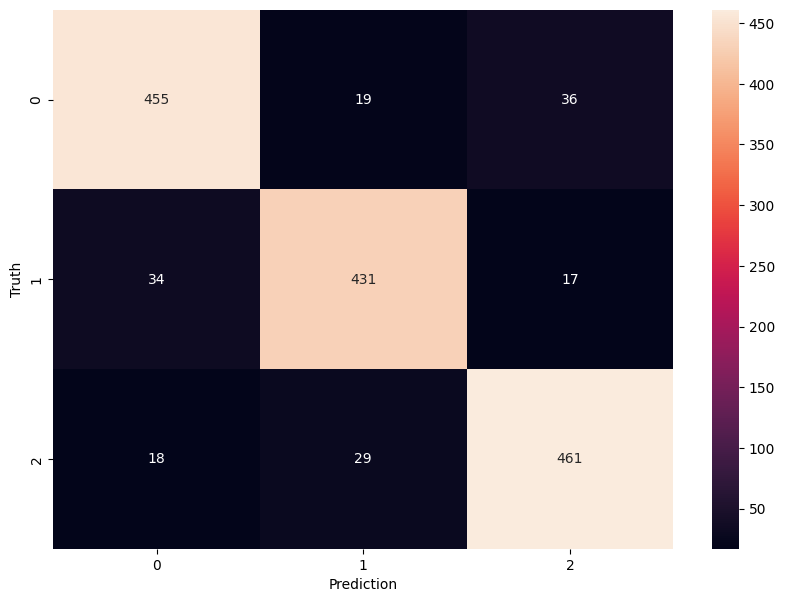

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')